In [3]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import numpy as np
import pandas.io.json as pd_json
from sqlalchemy import create_engine


In [4]:
jsonfile = pd.read_json("Resources/mergedjson.json")
jsonfile

modifiedjson = jsonfile.drop(['target_fg','target_og','contributed_by','boil_volume', 'method', 'volume'], axis = 1)

In [5]:
# getting rid of the NaNs in the IBU and ABV columns with column means
modifiedjson=modifiedjson.fillna(modifiedjson.mean())

In [6]:
#function to scale srm values based on scale
#https://www.twobeerdudes.com/beer/srm
def srmCat(s):
    if s['srm'] >= 1 and s['srm'] < 3:
        return 'Pale Straw'
    elif s['srm'] >=3 and s['srm'] < 4:
        return 'Straw'
    elif s['srm'] >=4 and s['srm'] < 6:
        return 'Pale Gold'
    elif s['srm'] >=6 and s['srm'] < 8:
        return 'Deep Gold'
    elif s['srm'] >=8 and s['srm'] < 10:
        return 'Pale Amber'
    elif s['srm'] >=10 and s['srm'] < 13:
        return 'Medium Amber'
    elif s['srm'] >=13 and s['srm'] < 17:
        return 'Deep Amber'
    elif s['srm'] >=17 and s['srm'] < 20:
        return 'Amber Brown'
    elif s['srm'] >=20 and s['srm'] < 24:
        return 'Brown'
    elif s['srm'] >=24 and s['srm'] < 35:
        return 'Ruby Brown'
    elif s['srm'] >=35 and s['srm'] < 40:
        return 'Deep Brown'
    elif s['srm'] >= 40:
        return 'Black'
    else:
        return 'Undefined'
    
modifiedjson['srm_category'] = modifiedjson.apply(srmCat, axis=1)

In [7]:
## lk
#function to turn SRM categories into a number
def srmCat2(i):
    if i['srm_category'] == 'Pale Lager, Pilsner, Witbier, Berliner Weisse':
        return 1
#   elif 25 >= i['ibu'] < 40:
    elif i['srm_category'] == 'Straw':
        return 2
    elif i['srm_category'] == 'Pale Gold':
        return 3
    elif i['srm_category'] == 'Deep Gold':
        return 4
    elif i['srm_category'] == 'Pale Amber':
        return 5
    elif i['srm_category'] == 'Medium Amber':
        return 6
    elif i['srm_category'] == 'Amber Brown':
        return 7
    elif i['srm_category'] == 'Deep Amber':
        return 8
    elif i['srm_category'] == 'Brown':
        return 9
    elif i['srm_category'] == 'Ruby Brown':
        return 10
    elif i['srm_category'] == 'Deep Brown':
        return 11
    elif i['srm_category'] == 'Black':
        return 12
    else:
        return 13
    
modifiedjson['srm_category_nbr'] = modifiedjson.apply(srmCat2, axis =1)

In [8]:
#function to scale ibu into 3 categories 
def ibuCat(i):
    if i['ibu'] >= 0 and i['ibu'] < 25:
        return 'IBU Low'
#   elif 25 >= i['ibu'] < 40:
    elif i['ibu'] >= 25 and i['ibu'] < 40:
        return 'IBU Medium'
    elif i['ibu'] >=40:
        return 'IBU High'
    else:
        return 'IBU Undefined'
    
modifiedjson['ibu_category'] = modifiedjson.apply(ibuCat, axis =1)

In [9]:
## lk
#function to turn ibu categories into a number
def ibuCat2(i):
    if i['ibu_category'] == 'IBU Low':
        return 1
#   elif 25 >= i['ibu'] < 40:
    elif i['ibu_category'] == 'IBU Medium':
        return 2
    elif i['ibu_category'] == 'IBU High':
        return 3
    else:
        return 4
    
modifiedjson['ibu_category_nbr'] = modifiedjson.apply(ibuCat2, axis =1)

In [10]:
#function to scale abv into 3 categories 
def abvCat(a):
    if a['abv'] >= 0 and a['abv'] < 9:
        return 'ABV Low'
#   elif 9 >= a['abv'] < 16:
    elif a['abv'] >= 9 and a['abv'] < 16:
        return 'ABV Medium'
    elif a['abv'] >=16:
        return 'ABV High'
    else:
        return 'ABV Undefined'

modifiedjson['abv_category'] = modifiedjson.apply(abvCat, axis =1)   

In [11]:
## lk
#function to turn ibu categories into a number
def abvCat2(a):
    if a['abv_category'] == 'ABV Low':
        return 1
    elif a['abv_category'] == 'ABV Medium':
        return 2
    elif a['abv_category'] == 'ABV High':
        return 3
    else:
        return 4

modifiedjson['abv_category_nbr'] = modifiedjson.apply(abvCat2, axis =1)   

In [12]:
#70-82
def attenCat(a):
    if a['attenuation_level'] >=0.0 and a['attenuation_level'] < 70.0:
        return 'Atten Low'
    elif a['attenuation_level'] >= 70.0 and a['attenuation_level'] < 82.0:
        return 'Atten Medium'
    elif a['attenuation_level'] >= 82.0:
        return 'Atten High'
    else:
        'Undefined'
        
modifiedjson['attenuation_category'] = modifiedjson.apply(attenCat, axis =1)    

In [13]:
## lk
#function to turn attenuation categories into a number
def attenCat2(i):
    if i['attenuation_category'] == 'Atten Low':
        return 1
#   elif 25 >= i['ibu'] < 40:
    elif i['attenuation_category'] == 'Atten Medium':
        return 2
    elif i['attenuation_category'] == 'Atten High':
        return 3
    else:
        return 4
    
modifiedjson['attenuation_category_nbr'] = modifiedjson.apply(attenCat2, axis =1)

In [14]:
beerdata = modifiedjson[['id','name','ibu','ibu_category','ibu_category_nbr','srm','srm_category','srm_category_nbr','abv','abv_category','abv_category_nbr', 'ebc','attenuation_level','attenuation_category','attenuation_category_nbr','description',
                        'image_url','ph', 'tagline','brewers_tips']].set_index('id')
# beerdata.to_csv('beerdata_lk.csv')
beerdata.dtypes

name                         object
ibu                         float64
ibu_category                 object
ibu_category_nbr              int64
srm                         float64
srm_category                 object
srm_category_nbr              int64
abv                         float64
abv_category                 object
abv_category_nbr              int64
ebc                         float64
attenuation_level           float64
attenuation_category         object
attenuation_category_nbr      int64
description                  object
image_url                    object
ph                          float64
tagline                      object
brewers_tips                 object
dtype: object

In [15]:
# combining columns to get a summary outcome column
# data = data2
beerdata['outcome'] = beerdata[['ibu_category','srm_category','abv_category',
                                'attenuation_category']].apply(lambda x: ' '.join(x), axis=1)


In [16]:
with open('Resources/mergedjson.json', encoding='utf8') as data_file:
    data = json.load(data_file)

maltdf = json_normalize(data, meta = ['id'], record_path=['ingredients',['malt']],errors='ignore')
# maltdf.drop(columns=['amount'])

maltdf = maltdf.groupby(maltdf['id']).agg(','.join)
maltdf = maltdf.rename(columns={'name': 'malts_name'})
maltdf

hopsdf = json_normalize(data, meta = ['id'], record_path =['ingredients', ['hops']], errors = 'ignore')
# hopsdf.drop(columns=['amount'])
hopsdf = hopsdf.groupby(hopsdf['id']).agg(','.join)
hopsdf = hopsdf.rename(columns={'add':'hops_add', 'attribute':'hops_attribute', 'name': 'hops_name'})

fooddf = json_normalize(data, meta =['id'], record_path=['food_pairing'], errors = 'ignore')
fooddf = fooddf.groupby(fooddf['id']).agg(','.join)
fooddf = fooddf.rename(columns = {0:'food_pairing'})

ingredf = maltdf.merge(hopsdf, how ='outer',left_index=True, right_index=True)
ingredf = ingredf.merge(fooddf, how = 'outer', left_index=True, right_index=True)
finaldata = beerdata.merge(ingredf, how= 'outer', left_index=True, right_index=True)

# finaldata.to_csv('finalbeerdata.csv')


In [17]:
# connection_string = "db/beerdata.sqlite"
# engine = create_engine(f'sqlite:///{connection_string}')
# finaldata.to_sql(name='finaldata', con=engine, if_exists='append', index=True)

In [18]:
# working on decision tree (unit 21, 2-4) - i don't think RandomForest will work
from sklearn import tree
import os


In [19]:
# data2 = data2.drop("ibu_category", axis=1)
data2 = finaldata[['ibu','ibu_category_nbr', 'srm', 'srm_category_nbr', 'abv','abv_category_nbr', 'attenuation_level','attenuation_category_nbr']]
feature_names = data2.columns
data2.dtypes

ibu                         float64
ibu_category_nbr              int64
srm                         float64
srm_category_nbr              int64
abv                         float64
abv_category_nbr              int64
attenuation_level           float64
attenuation_category_nbr      int64
dtype: object

In [20]:
data2.head()

,ibu,ibu_category_nbr,srm,srm_category_nbr,abv,abv_category_nbr,attenuation_level,attenuation_category_nbr
id,,,,,,,,
1,60.0,3,10.0,6,4.5,1,75.0,2
2,41.5,3,15.0,8,4.1,1,76.0,2
3,8.0,1,4.0,3,4.2,1,83.0,3
4,55.0,3,15.0,8,6.3,1,80.0,2
5,59.0,3,5.0,3,7.2,1,67.0,1


In [21]:
finaldata.head()

,name,ibu,ibu_category,ibu_category_nbr,srm,srm_category,srm_category_nbr,abv,abv_category,abv_category_nbr,...,image_url,ph,tagline,brewers_tips,outcome,malts_name,hops_add,hops_attribute,hops_name,food_pairing
id,,,,,,,,,,,,,,,,,,,,,
1,Buzz,60.0,IBU High,3,10.0,Medium Amber,6,4.5,ABV Low,1,...,https://images.punkapi.com/v2/keg.png,4.4,A Real Bitter Experience.,The earthy and floral aromas from the hops can...,IBU High Medium Amber ABV Low Atten Medium,"Maris Otter Extra Pale,Caramalt,Munich","start,start,middle,middle,end","bitter,bitter,flavour,flavour,flavour","Fuggles,First Gold,Fuggles,First Gold,Cascade","Spicy chicken tikka masala,Grilled chicken que..."
2,Trashy Blonde,41.5,IBU High,3,15.0,Deep Amber,8,4.1,ABV Low,1,...,https://images.punkapi.com/v2/2.png,4.4,You Know You Shouldn't,Be careful not to collect too much wort from t...,IBU High Deep Amber ABV Low Atten Medium,"Maris Otter Extra Pale,Caramalt,Munich","start,start,end,end","bitter,bitter,flavour,flavour","Amarillo,Simcoe,Amarillo,Motueka","Fresh crab with lemon,Garlic butter dipping sa..."
3,Berliner Weisse With Yuzu - B-Sides,8.0,IBU Low,1,4.0,Pale Gold,3,4.2,ABV Low,1,...,https://images.punkapi.com/v2/keg.png,3.2,Japanese Citrus Berliner Weisse.,Clean everything twice. All you want is the cl...,IBU Low Pale Gold ABV Low Atten High,"Propino Pale Malt,Wheat Malt,Propino Pale Malt...",middle,bitter,Bramling Cross,"Smoked chicken wings,Miso ramen,Yuzu cheesecake"
4,Pilsen Lager,55.0,IBU High,3,15.0,Deep Amber,8,6.3,ABV Low,1,...,https://images.punkapi.com/v2/4.png,4.4,Unleash the Yeast Series.,Play around with the fermentation temperature ...,IBU High Deep Amber ABV Low Atten Medium,"Extra Pale,Caramalt,Dark Crystal,Munich","start,start,middle,middle,end,end","bitter,bitter,flavour,flavour,flavour,flavour","Centennial,Amarillo,Centennial,Amarillo,Centen...","Spicy crab cakes,Spicy cucumber and carrot Tha..."
5,Avery Brown Dredge,59.0,IBU High,3,5.0,Pale Gold,3,7.2,ABV Low,1,...,https://images.punkapi.com/v2/5.png,4.4,Bloggers' Imperial Pilsner.,Make sure you have a big enough yeast starter ...,IBU High Pale Gold ABV Low Atten Low,"Lager Malt,Wheat","start,middle,end","bitter,flavour,flavour","Saaz,Saaz,Saaz","Vietnamese squid salad,Chargrilled corn on the..."


In [22]:
finaldata.dtypes

name                         object
ibu                         float64
ibu_category                 object
ibu_category_nbr              int64
srm                         float64
srm_category                 object
srm_category_nbr              int64
abv                         float64
abv_category                 object
abv_category_nbr              int64
ebc                         float64
attenuation_level           float64
attenuation_category         object
attenuation_category_nbr      int64
description                  object
image_url                    object
ph                          float64
tagline                      object
brewers_tips                 object
outcome                      object
malts_name                   object
hops_add                     object
hops_attribute               object
hops_name                    object
food_pairing                 object
dtype: object

In [23]:
application_df = finaldata[['name', 'ibu','srm_category', 'abv', 'attenuation_level', 'tagline','food_pairing','outcome']]
application_df.to_csv('application_file.csv')
application_df.head()

,name,ibu,srm_category,abv,attenuation_level,tagline,food_pairing,outcome
id,,,,,,,,
1,Buzz,60.0,Medium Amber,4.5,75.0,A Real Bitter Experience.,"Spicy chicken tikka masala,Grilled chicken que...",IBU High Medium Amber ABV Low Atten Medium
2,Trashy Blonde,41.5,Deep Amber,4.1,76.0,You Know You Shouldn't,"Fresh crab with lemon,Garlic butter dipping sa...",IBU High Deep Amber ABV Low Atten Medium
3,Berliner Weisse With Yuzu - B-Sides,8.0,Pale Gold,4.2,83.0,Japanese Citrus Berliner Weisse.,"Smoked chicken wings,Miso ramen,Yuzu cheesecake",IBU Low Pale Gold ABV Low Atten High
4,Pilsen Lager,55.0,Deep Amber,6.3,80.0,Unleash the Yeast Series.,"Spicy crab cakes,Spicy cucumber and carrot Tha...",IBU High Deep Amber ABV Low Atten Medium
5,Avery Brown Dredge,59.0,Pale Gold,7.2,67.0,Bloggers' Imperial Pilsner.,"Vietnamese squid salad,Chargrilled corn on the...",IBU High Pale Gold ABV Low Atten Low


In [24]:
from sklearn.model_selection import train_test_split
#train_test_split?

In [25]:
features = finaldata[['ibu_category_nbr','srm_category_nbr', 'abv_category_nbr','attenuation_category_nbr']]
outcomes = finaldata[['outcome']]
#X_train, X_test, y_train, y_test = train_test_split(features, outcomes, random_state=42)

In [22]:
## MODEL ALREADY RUN.  DON'T RUN THIS CELL OR YOU WILL CHANGE THE MODEL.

# accuracy of predicting OUTCOME Category
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

0.9146341463414634

In [25]:
clf.predict(np.array([[1,1,1,1]]))

array(['IBU Low Straw ABV Low Atten Medium'], dtype=object)

In [ ]:
import pickle
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier_20200107.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(clf, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

In [ ]:
# load it back up and try to predict

decision_tree_model_pkl = open(decision_tree_pkl_filename, 'rb')
saved_model = pickle.load(decision_tree_model_pkl)

saved_model.predict(np.array([[1,1,1,1]]))

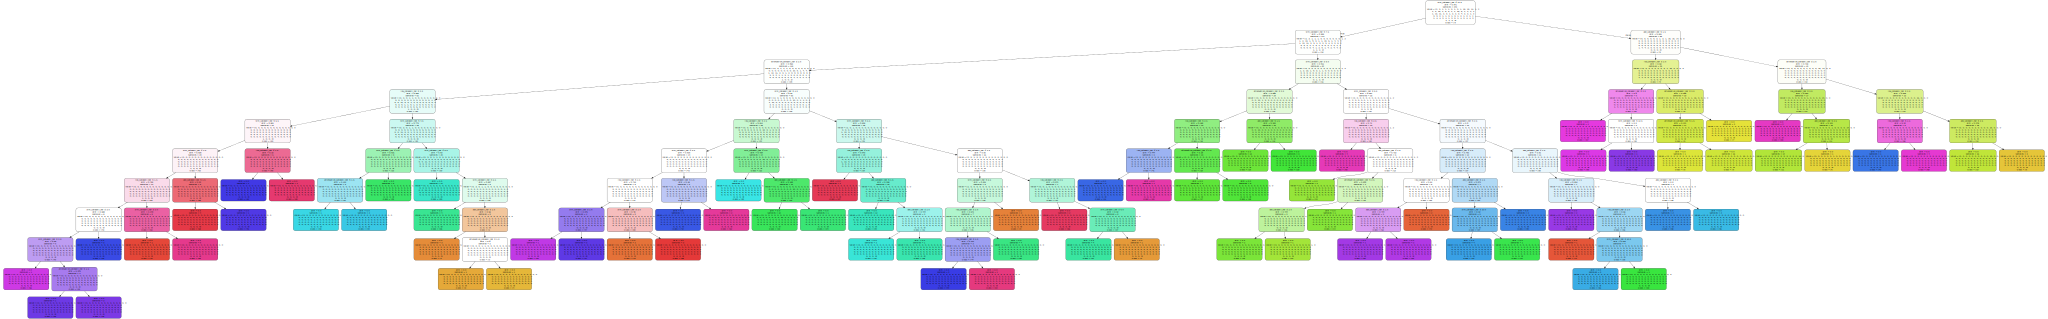

In [34]:
import graphviz
feature_names = ['ibu_category_nbr','srm_category_nbr', 'abv_category_nbr','attenuation_category_nbr']
dot_data = tree.export_graphviz(
    saved_model, out_file=None,
    feature_names=feature_names,
    class_names=True,
    filled=True, rounded=True,
    special_characters=True)
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt.png')
graph = graphviz.Source(dot_data)
graph

In [27]:
# below for fast reference
application_df.head()

,name,ibu,srm_category,abv,attenuation_level,tagline,food_pairing,outcome
id,,,,,,,,
1,Buzz,60.0,Medium Amber,4.5,75.0,A Real Bitter Experience.,"Spicy chicken tikka masala,Grilled chicken que...",IBU High Medium Amber ABV Low Atten Medium
2,Trashy Blonde,41.5,Deep Amber,4.1,76.0,You Know You Shouldn't,"Fresh crab with lemon,Garlic butter dipping sa...",IBU High Deep Amber ABV Low Atten Medium
3,Berliner Weisse With Yuzu - B-Sides,8.0,Pale Gold,4.2,83.0,Japanese Citrus Berliner Weisse.,"Smoked chicken wings,Miso ramen,Yuzu cheesecake",IBU Low Pale Gold ABV Low Atten High
4,Pilsen Lager,55.0,Deep Amber,6.3,80.0,Unleash the Yeast Series.,"Spicy crab cakes,Spicy cucumber and carrot Tha...",IBU High Deep Amber ABV Low Atten Medium
5,Avery Brown Dredge,59.0,Pale Gold,7.2,67.0,Bloggers' Imperial Pilsner.,"Vietnamese squid salad,Chargrilled corn on the...",IBU High Pale Gold ABV Low Atten Low


In [2]:

connection_string = "db/beerdata2.sqlite"
engine = create_engine(f'sqlite:///{connection_string}')
engine.execute('''CREATE TABLE finaldata (
    id INT,
    name TEXT,
    ibu FLOAT,
    srm_category TEXT,
    abv FLOAT,
    attenuation_level FLOAT,
    tagline TEXT,
    food_pairing TEXT,
    outcome TEXT,
    primary key("id"));''')

application_df.to_sql(name='applicationdata2', con=engine, index=False, if_exists='append')

NameError: name 'application_df' is not defined